In [119]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [120]:
df = pd.read_csv('../datasets/weather/jp_weather.csv',decimal=",")
df = df.drop('Value', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=["Date"])
df['Celsius'] = pd.to_numeric(df['Celsius'])
df['Celsius'] = df['Celsius'].round(2)


In [121]:
#saving latitude and longitude to a list of dictionary
stations = df['Station'].unique()
Positions = []
for station in stations:
    #display(station ,df[df['Station'] == station][['LAT']][:1].values[0][0])
    Positions.append({'loc':[df[df['Station'] == station][['LAT']][:1].values[0][0], df[df['Station'] == station][['LON']][:1].values[0][0]],
                      'station':station})

In [122]:
# Making a map using the folium module
import folium
jp_map = folium.Map()

# Adding markers to the map
for position in Positions:
    marker = folium.Marker(location=position['loc'], popup=position['station']+" STATION")
    marker.add_to(jp_map)

# The last object in the cell always gets shown in the notebook
jp_map

In [123]:
# Japan mean temperature 
df.describe()

,Celsius
count,100000.000000
mean,15.402511
std,9.177219
min,-17.390000
25%,8.560000
50%,16.110000
75%,22.940000
max,35.890000


#### Tokyo International Airport

In [124]:
tokyo_intl_df =  df[df['Station']=='TOKYO INTL'] 

tokyo_intl_df.describe()

,Celsius
count,1000.000000
mean,17.345110
std,7.691579
min,1.560000
25%,10.390000
50%,17.280000
75%,23.780000
max,31.610000


Text(0.5, 1.0, 'Tokyo International Airport mean temp')

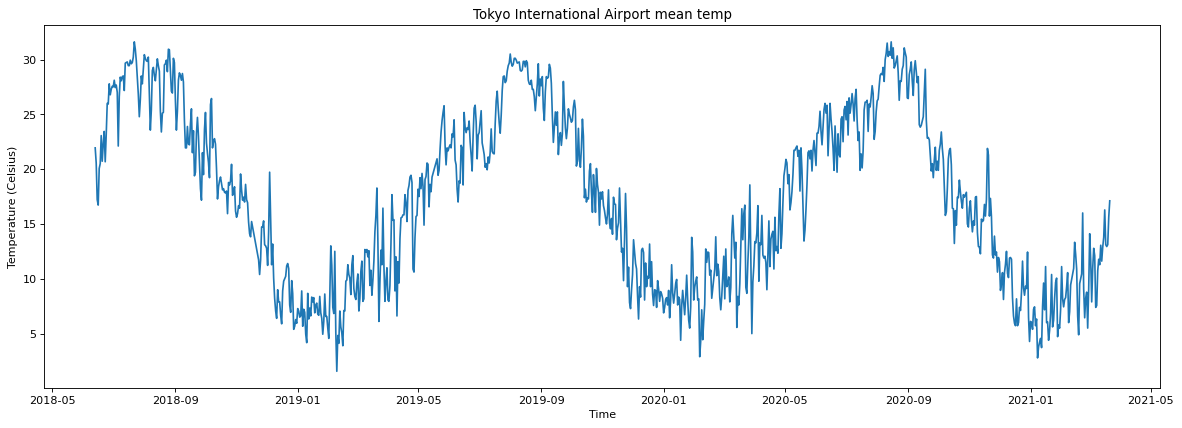

In [125]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_intl_df['Date'], tokyo_intl_df['Celsius'])
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Tokyo International Airport mean temp')

In [126]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(tokyo_intl_df['Celsius'])
print(results)
print('p-value: ' + str(results[1]))

# H0: the series is non-stationary (there's strong seasonality within)
if (results[1] > 0.05):
    print("Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure")
else:
    print('Reject H0, series is stationary')

(-1.9286550796246564, 0.31870322499477444, 18, 981, {'1%': -3.4370334797663844, '5%': -2.8644907213150725, '10%': -2.568341114581742}, 4178.2575176931205)
p-value: 0.31870322499477444
Cannot reject H0, series is non-stationary, can be represented by a unit root, has some time dependent structure


#### Tokyo Heliport

In [127]:
tokyo_heliport_df =  df[df['Station']=='TOKYO HELIPORT'] 
tokyo_heliport_df.describe()

,Celsius
count,1000.000000
mean,18.433080
std,7.874053
min,0.780000
25%,11.220000
50%,18.330000
75%,25.220000
max,33.110000


Text(0.5, 1.0, 'Tokyo Heliport mean temp')

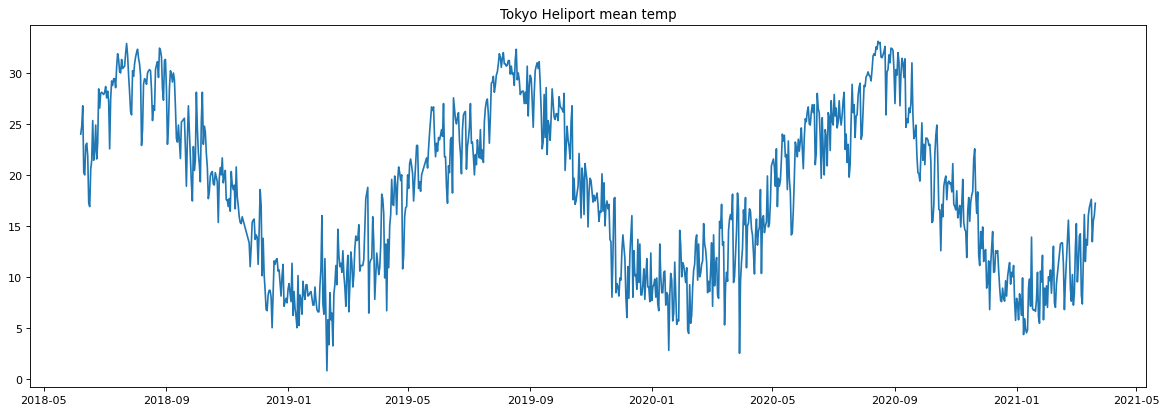

In [128]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_heliport_df['Date'], tokyo_heliport_df['Celsius'])
plt.title('Tokyo Heliport mean temp')

In [129]:
from sklearn.model_selection import train_test_split
X = tokyo_heliport_df['Date']
y = tokyo_heliport_df['Celsius']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

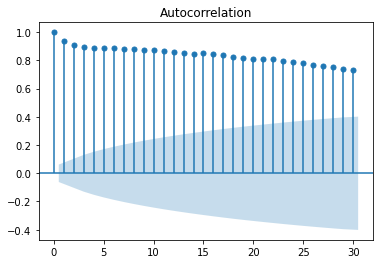

In [130]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
#y = np.random.rand(100)
plot_acf(y)
pyplot.show()

# temperatures are strongly correlated, past temps influence future temps.

### Rolling regression

In [131]:
x = np.arange(0,100)
y = (np.sin(x)+1)*10+2*x+np.random.rand(100)*5

points = 12
names = []
for i in range(points):
  names.append("a"+str(i))
ds = []
target = []
for i in range(points,len(x)-1):
  ds.append(y[i-points:i])
  target.append(y[i]) 
df = pd.DataFrame(np.array(ds),columns=names) 
dfy = df 
dfy["target"] = target

In [132]:
dfy[names]

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11
0,12.263572,22.790064,25.280074,18.543922,14.283400,11.901498,21.300597,32.017489,40.158194,34.448089,26.103947,25.204982
1,22.790064,25.280074,18.543922,14.283400,11.901498,21.300597,32.017489,40.158194,34.448089,26.103947,25.204982,29.203490
2,25.280074,18.543922,14.283400,11.901498,21.300597,32.017489,40.158194,34.448089,26.103947,25.204982,29.203490,41.526229
3,18.543922,14.283400,11.901498,21.300597,32.017489,40.158194,34.448089,26.103947,25.204982,29.203490,41.526229,50.919052
4,14.283400,11.901498,21.300597,32.017489,40.158194,34.448089,26.103947,25.204982,29.203490,41.526229,50.919052,49.120707
...,...,...,...,...,...,...,...,...,...,...,...,...
82,179.635357,186.995532,187.711962,179.697445,173.846652,177.267077,190.690578,199.393161,201.308229,194.037839,187.350062,188.460939
83,186.995532,187.711962,179.697445,173.846652,177.267077,190.690578,199.393161,201.308229,194.037839,187.350062,188.460939,196.213439
84,187.711962,179.697445,173.846652,177.267077,190.690578,199.393161,201.308229,194.037839,187.350062,188.460939,196.213439,210.905834
85,179.697445,173.846652,177.267077,190.690578,199.393161,201.308229,194.037839,187.350062,188.460939,196.213439,210.905834,213.267764


In [133]:
dfy['target'].shape

(87,)

In [134]:
dfy[names].shape

(87, 12)

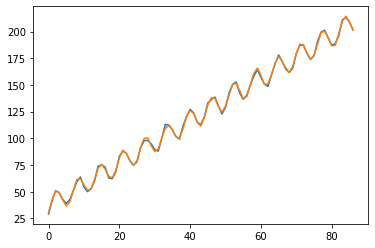

In [135]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(dfy[names],dfy["target"])
plt.plot(np.arange(len(df)),df["target"])
plt.plot(np.arange(len(df)),model.predict(dfy[names]))

In [136]:
last = dfy.iloc[-1]
prediction = []
n = []
for i in range(points-1):
  n.append(last["a"+str(i+1)])
n.append(last["target"])
n.append(model.predict(np.array(n).reshape(1,-1))[0])
prediction.append(n[-1])
for i in range(100):
  n = n[1:]
  n.append(model.predict(np.array(n).reshape(1,-1))[0])
  prediction.append(n[-1])

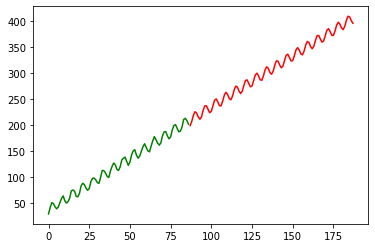

In [137]:
plt.plot(np.arange(len(dfy)),dfy["target"],c="green")
plt.plot(np.arange(len(dfy),len(dfy)+len(prediction)),prediction,c="red")

#### Custom simple linear regression

In [138]:
tokyo_intl_df.index = pd.to_datetime(tokyo_intl_df['Date'])
tokyo_intl_df = tokyo_intl_df.drop("Date", axis = 1)
tokyo_intl_2020_df = tokyo_intl_df.loc['2020']
x = tokyo_intl_2020_df['Celsius'] #2020 data only

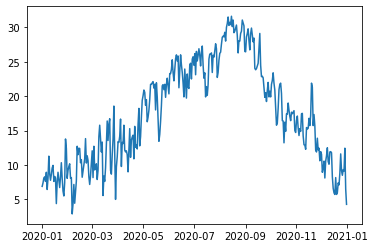

In [140]:
plt.plot(x)

In [168]:
X_test = x[:180]
Y_test = X_test.index.to_julian_date()
Y_test =np.array(Y_test)
X_test = np.array(X_test)

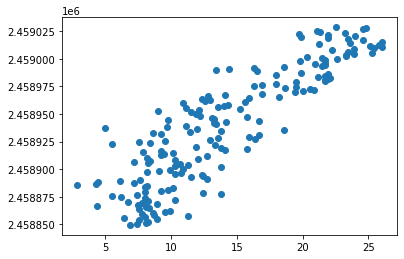

In [166]:
plt.scatter(X_test, Y_test)

In [240]:
#good old ols :)
def get_coeff_b1(X,Y):
    a = [round((x-X.mean()),5) for x in X]
    b = [round((y-Y.mean()),5) for y in Y]
    a = np.array(a)
    b = np.array(b)
    c = np.dot(a,b)
    d = np.square(a).sum()
    b1 = c/d
    return b1

def get_intercept_b0(X, Y, b1):
    b1 = Y.mean() - b1*X.mean()
    return b1

def get_regression_line(b1,b0, X_min, X_max):
    print("y_hat = ",b1,"*x + ",b0)
    y_hat = np.array([x*b1+b0 for x in range(X_min, X_max)])
    return y_hat
b1 = get_coeff_b1(X_test,Y_test)
b0 = get_intercept_b0(X_test,Y_test, b1)
y_hat = get_regression_line(b1, b0,5,30)

y_hat =  7.69911745315424 *x +  2458829.960821341


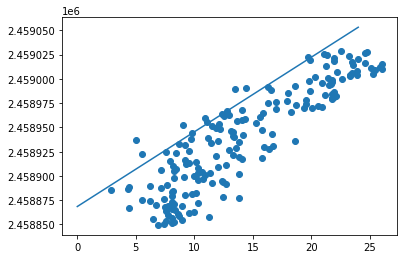

In [241]:
plt.plot(y_hat)
plt.scatter(X_test, Y_test)


In [254]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = X_test.reshape(-1,1)
# y = 1 * x_0 + 2 * x_1 + 3
#y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, Y_test)
print(reg.coef_)
print(reg.intercept_)

[7.69911745]
2458829.960821341


In [253]:
from sklearn.metrics import mean_squared_error
y_true = y_test
mean_squared_error(y_pred, Y_test)

358403628383696.9

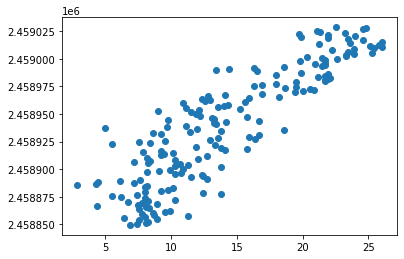

In [242]:
plt.scatter(X_test, Y_test)